## Simulated Data Sets and a Demonstration of Central Limit Theorem

Material to accompany coverage in Hughes and Hase.

- Introductory section complements Section 3.5, and generates graphs like those in Figs.3.6, 3.7, 3.8.
- Second section complements Chapter 8 on hypothesis testing using $\chi^2$

<span style=" color:red">NOTE</span>: In this notebook I use the module scipy.stats for all statistics functions, including generation of random numbers. There are other modules with some overlapping functionality, e.g., the regular python random module, and the scipy.random module, but I do not use them here. The scipy.stats module includes tools for a large number of distributions, it includes a large and growing set of statistical functions, and there is a unified class structure. (And namespace issues are minimized.) See https://docs.scipy.org/doc/scipy/reference/stats.html.

In [1]:
import scipy as sp
from scipy import stats

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

### Rolling of the dice

Consider rolling a fair 6-sided die many times and recording the results.
This "original" distribution has a mean and variance  given by 
- $\mu = \sum_{i=1}^6 p_i\, i = \sum_{i=1}^6 \frac{1}{6}\times i$
- $\sigma^2 = \frac{1}{6}\sum_{i=1}^6(i-\mu)^2$

In [2]:
i = sp.arange(1, 7, 1)
mu = sum(i)/6
sigma = sp.sqrt(sum((i - mu)**2)/6)
mu, sigma

(3.5, 1.707825127659933)

The following code simulates rolling the die 10 times by sampling random numbers betwen 1 and 6:

In [3]:
low, high, n = (1, 6, 10)
sp.stats.randint.rvs(low, high+1, size=n)
#sp.random.randint(low, high+1, n)

array([1, 5, 4, 5, 3, 5, 4, 2, 5, 3])

And the average of a sample of 10 numbers from this distribution is

In [4]:
sum(sp.stats.randint.rvs(low, high+1, size=n))/n

2.8999999999999999

or

In [5]:
sp.mean(sp.stats.randint.rvs(low, high+1, size=n))

3.7000000000000002

The average of a fixed number of rolls is itself a random variable.  The question is: What is the probability distribution for the average?  Let's repeat the "experiment" 1000 times and look at the distribution of values, but this time let's let the number of rolls in each experiment be $n=400$.

In the language of Hughes and Hase on p. 33 (right before the beginning of Section 3.5.1,
the values of $x_1$, $x_2$, $x_3$, etc., are the results of individual rolls of the die, and $N$ corresponds the number of rolls that are going to be averaged (400) to get a sample mean.  The number of "experiments" (nEx) is the number of times we calculate the mean to get the distribution of the sample means. 

In [6]:
# Simulation - "unpythonic" version
n_ex = 1000
n = 400
sim_data = sp.array([])  # Create an empty array
for i in range(n_ex):
    sim_data = sp.append(sim_data, sp.mean(sp.stats.randint.rvs(low, high+1, size=n)))

In [7]:
# Simulation - more concise
n_ex = 1000
n = 400
sim_data = sp.array([sp.mean(sp.random.randint(low, high+1, n)) for i in range(n_ex)])

<IPython.core.display.Javascript object>


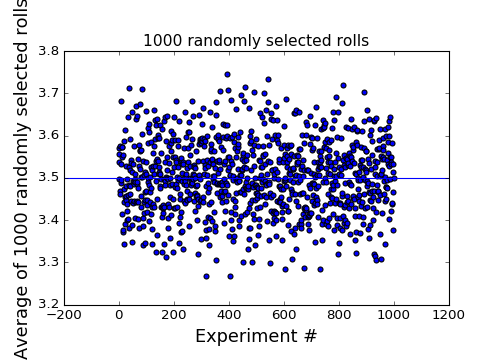

In [8]:
plt.figure(1)
x = sp.linspace(0, n_ex, n_ex)
y = sim_data
#plt.xlim(0,n_ex)
plt.axhline(mu)
plt.xlabel('Experiment #')
plt.ylabel('Average of %s randomly selected rolls'%(n_ex))
plt.title('%s randomly selected rolls'%(n_ex))
plt.scatter(x, y)
plt.show()

In [9]:
len(sim_data), len(x)

(1000, 1000)

The central limit theorem says that this data should be approaching a normal distribution with a mean and standard deviation given by
- $\mu_\text{sample} =\mu$
- $\sigma_\text{sample} = \frac{\sigma}{\sqrt{n}}$

Let's look at the simulated data. First, let's look at a histogram of the sample averages.

<IPython.core.display.Javascript object>


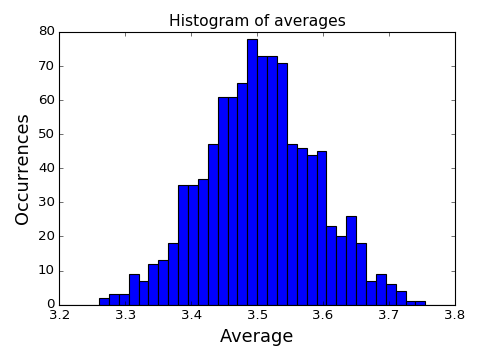

In [10]:
plt.figure(2)
nbin, low, high = [40, 3.20, 3.80]
plt.xlim(low, high)
plt.xlabel("Average")
plt.ylabel("Occurrences")
plt.title("Histogram of averages")
plt.hist(sim_data,nbin, [low,high], edgecolor='black');
plt.show()

This resembles a normal distribution, but let's check the mean and standard deviation. The CLT predicts $\mu_\text{CLT} = \mu$ and $\sigma_\text{CLT}= \sigma/\sqrt{400}$.

In [11]:
mu_sample = sp.mean(sim_data)
sigma_sample = sp.std(sim_data)
mu_sample, sigma_sample

(3.5027124999999999, 0.084192405202310264)

In [12]:
sigmaCLT = sigma/sp.sqrt(n)
sigmaCLT

0.085391256382996647

Agreement with standard deviation predicted by CLT is pretty good.

### Hypothesis testing: $\chi^2$ test (From Chapter 8 of Hughes and Hase)

Question: The binned data in Fig.2 looks like it could be from a normal distribution, but can 
we be more quantitative?  Is there statistical evidence that the probablity that the data presented in Figs. 1 and 2 came from a normal distribution with mean $\mu=3.5$ and standard deviation $\sigma_\rm{sam} = 3.5/\sqrt{400}$?  The idea is to test the null hypothesis: 
assume that the data comes from the assumed distribution, and see if there is evidence that it doesn't.

The approach is outlined in Ch. 8, and the steps are in the bulleted list on p. 112.
- The histogram of $O_i$ (of H&H), the binned data, is in the array "observed."
- The histogram of $E_i$ (of H&H), the expected occurrences, is in the array "expected" (calculated using the CDF of a normal distribution with the assumed mean and standard deviation).
- The value of $\chi^2$ is given by 
$$ \chi^2 = \sum_i \frac{(O_i - E_i)^2}{E_i}  $$

<IPython.core.display.Javascript object>


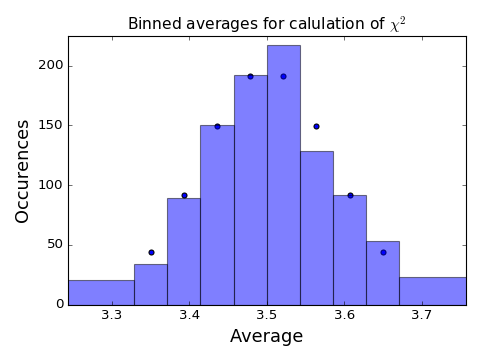

In [13]:
plt.figure(3)
bins = sp.array([-10, -2., -1.5, -1., -0.5, 0., 0.5, 1., 1.5, 2., 10])*sigmaCLT
bins = bins + mu*sp.ones(len(bins))
plt.xlim(mu-3*sigmaCLT, mu+3*sigmaCLT)
plt.ylim(0,225)
observed = plt.hist(sim_data, bins, alpha=0.5, edgecolor='black')[0] # alpha controls opacity
expected =sp.array([sp.stats.norm.cdf(bins[i], mu, sigmaCLT) - sp.stats.norm.cdf(bins[i-1],\
                        mu, sigmaCLT) for i in range(1, len(bins))])*n_ex
binMid = sp.array([(bins[i]+bins[i-1])/2 for i in range(1, len(bins))])
plt.scatter(binMid,expected)
plt.title("Binned averages for calulation of $\chi^2$")
plt.xlabel("Average")
plt.ylabel("Occurences")
plt.show()

Calculate $\chi^2$ and $\chi^2_\nu$:

In [14]:
chi2 = sum((observed - expected)**2/expected)
d = len(observed) - 1
chi2/d

1.1838045392154173

Calcuate $P(\chi^2;\nu)$:

In [15]:
sp.stats.chi2.cdf(chi2, d)

0.69984474488252124

CONCLUSION: For the run shown in the posted html version of the notebook, the value of $\chi^2_\nu \simeq 1.18 \sim 1$ indicates that there is no evidence that the data DIDN'T come from the assumed model.  The value $P(\chi^2;\nu) = 0.70)$ indicates that there is a probability of $(1-0.70)=0.30$ that data selected from the assumed distribution would result in a value of $\chi^2_\nu > 1.18$.  There is no reason to reject the null hypothesis that the data was drawn from the assumed distribution that is predicted by the CLT.

Rule-of-thumb guidelines are discussed on p. 112 of Hughes and Hase.

### Version details

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [16]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [17]:
%version_information scipy, matplotlib

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
matplotlib 2.0.2
Tue Aug 01 10:47:39 2017 EDT